In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
import string
from PIL import ImageFont
from PIL import Image, ImageTk
from wordcloud.wordcloud import STOPWORDS
stopwords=set(STOPWORDS)
from collections import Counter
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.layers import Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, roc_auc_score
# Instead of importing directly from bnlp.corpus, import specific modules or functions
#from bnlp.corpus import stopwords as bnlp_stopwords # Import stopwords from bnlp and rename it
#from bnlp.corpus import punctuations, letters, digits
from sklearn.metrics import accuracy_score
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import re
import unicodedata
import nltk
from nltk.corpus import stopwords as nltk_stopwords # Import stopwords from nltk and rename it
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input
from tqdm import tqdm
import pickle
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import itertools
from sklearn.utils import shuffle
#from bnlp.corpus.util import remove_stopwords
#from bnltk.stemmer import BanglaStemmer
#import banglanltk as bn
from matplotlib import font_manager
from transformers import DistilBertTokenizer, TFDistilBertModel
import seaborn as sn
from tensorflow.keras.layers import Dense, GRU, Embedding
import warnings
warnings.simplefilter('ignore')
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
import transformers

from transformers import DistilBertTokenizer, DistilBertModel
import logging
logging.basicConfig(level=logging.ERROR)
from nltk.tokenize import word_tokenize
from nltk import FreqDist
%matplotlib inline

In [5]:
df = pd.read_csv("/content/NewsTitle.csv")

In [6]:
df.head()

,Title,Paper Name,Title Category,Date
0,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম,ইত্তেফাক,International,1 January 2023
1,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪,ইত্তেফাক,International,1 January 2023
2,এনডিটিভির পরিচালনা পর্ষদ থেকে দুই প্রতিষ্ঠাতার...,ইত্তেফাক,International,1 January 2023
3,গুজরাটে চালকের হার্ট অ্যাটাক বাস-গাড়ি মুখোমুখি...,ইত্তেফাক,International,1 January 2023
4,নতুন স্বপ্ন নিয়ে ২০২৩ সালকে বরণ বিশ্ববাসীর,ইত্তেফাক,International,1 January 2023


In [7]:
df=df.drop(['Paper Name', 'Date'], axis=1)
df.head()

,Title,Title Category
0,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম,International
1,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪,International
2,এনডিটিভির পরিচালনা পর্ষদ থেকে দুই প্রতিষ্ঠাতার...,International
3,গুজরাটে চালকের হার্ট অ্যাটাক বাস-গাড়ি মুখোমুখি...,International
4,নতুন স্বপ্ন নিয়ে ২০২৩ সালকে বরণ বিশ্ববাসীর,International


In [9]:
df["Title Category"].value_counts()

,count
Title Category,
National,2089
International,2085
Sports,2019


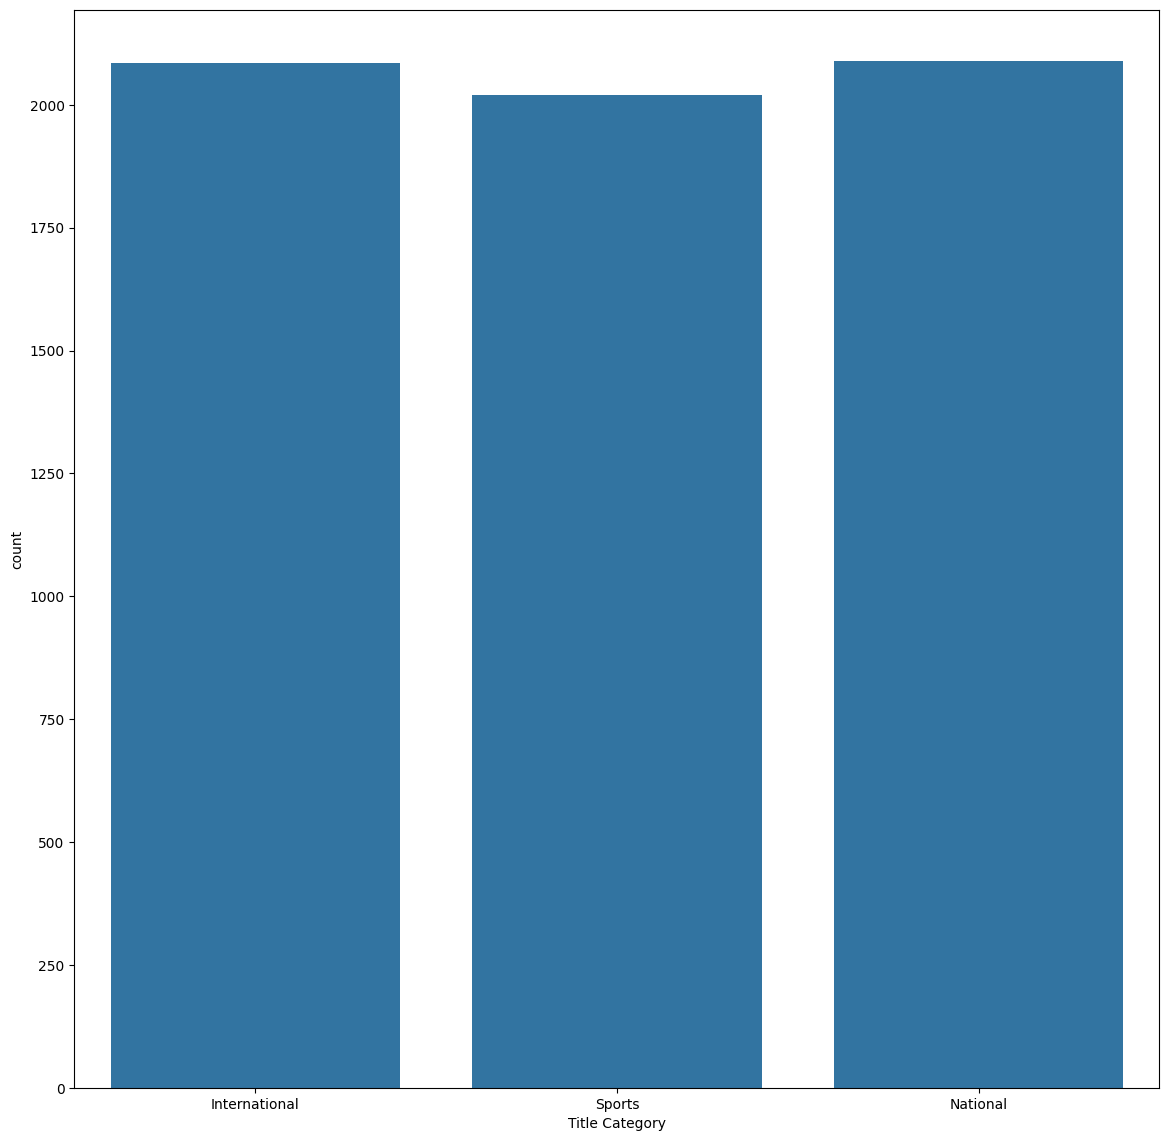

In [10]:
plt.figure(figsize=(14,14))

sns.countplot(x="Title Category",data=df)
plt.show()

In [11]:
df.columns=["Title","Title Category"]

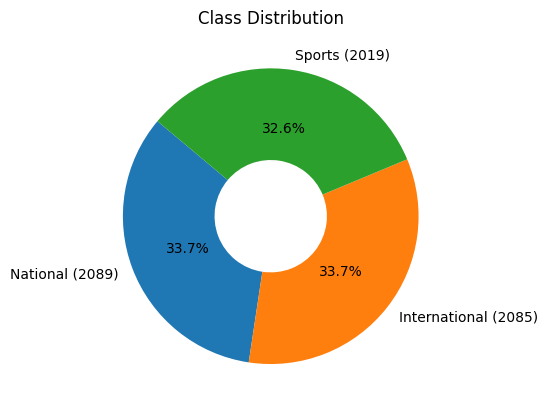

In [12]:
# Calculate the counts and percentages
class_counts = df['Title Category'].value_counts()
class_percents = class_counts / class_counts.sum() * 100

# Create labels with both the percentage and the quantity
labels = [f'{category} ({count})' for category, count in zip(class_counts.index, class_counts)]

# Plot the donut chart
plt.pie(class_percents, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.62})
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

In [13]:
df['Title'] = df['Title'].astype(str)

df.to_csv('Title', index=False, encoding='utf-8')

In [14]:
df.dtypes

,0
Title,object
Title Category,object


In [15]:
df.shape

(6193, 2)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(6056, 2)

In [18]:
def remove_non_bengali_characters(Title):
    cleaned = re.sub(r'[^\u0980-\u09FF\s]+', ' ', Title)
    return cleaned.strip()

# Assuming df is your DataFrame and 'Title' is a column containing text data
df['Title'] = df['Title'].apply(remove_non_bengali_characters)

In [19]:
# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['New_Title'] = df['Title'].apply(remove_non_bengali_chars)

In [20]:
def process_conversations(Conversation):
    stp = open('/content/stopwords_bn.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [25]:
df['cleaned'] = df['New_Title'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',df.New_Title[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df['Title Category'][i],'\n')

Original:
 এক বার জুতোর ফিতা বেঁধেই ১ কোটি ২৩ লাখ 
Cleaned:
 এক জুতোর ফিতা বেঁধেই ১ ২৩ লাখ 
 Detected as:--  Sports 

Original:
 তেল উত্তোলনে চীনা প্রতিষ্ঠানের সঙ্গে তালেবানের চুক্তি 
Cleaned:
 তেল উত্তোলনে চীনা প্রতিষ্ঠানের তালেবানের চুক্তি 
 Detected as:--  International 



In [26]:
df

,Title,Title Category,New_Title,cleaned
0,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম,International,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম
1,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪,International,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪
2,এনডিটিভির পরিচালনা পর্ষদ থেকে দুই প্রতিষ্ঠাতার...,International,এনডিটিভির পরিচালনা পর্ষদ থেকে দুই প্রতিষ্ঠাতার...,এনডিটিভির পরিচালনা পর্ষদ প্রতিষ্ঠাতার পদত্যাগ ...
3,গুজরাটে চালকের হার্ট অ্যাটাক বাস গাড়ি মুখোমুখি...,International,গুজরাটে চালকের হার্ট অ্যাটাক বাস গাড়ি মুখোমুখি...,গুজরাটে চালকের হার্ট অ্যাটাক বাস গাড়ি মুখোমুখি...
4,নতুন স্বপ্ন নিয়ে ২০২৩ সালকে বরণ বিশ্ববাসীর,International,নতুন স্বপ্ন নিয়ে ২০২৩ সালকে বরণ বিশ্ববাসীর,স্বপ্ন ২০২৩ সালকে বরণ বিশ্ববাসীর
...,...,...,...,...
6188,কাবরেরার ক্যাম্পে আরও ১১ জন,International,কাবরেরার ক্যাম্পে আরও ১১ জন,কাবরেরার ক্যাম্পে ১১
6189,হলান্ডের প্রিয় খাবার কাঁচা মাছ,International,হলান্ডের প্রিয় খাবার কাঁচা মাছ,হলান্ডের প্রিয় খাবার কাঁচা মাছ
6190,কামিন্স ফিরেই জেতালেন অসিদের,International,কামিন্স ফিরেই জেতালেন অসিদের,কামিন্স ফিরেই জেতালেন অসিদের
6191,পাকিস্তানও হারিয়ে দেবে ভারতকে,International,পাকিস্তানও হারিয়ে দেবে ভারতকে,পাকিস্তানও হারিয়ে দেবে ভারতকে


In [27]:
df.drop(["Title","New_Title"],axis=1,inplace=True)

In [28]:
df

,Title Category,cleaned
0,International,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম
1,International,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪
2,International,এনডিটিভির পরিচালনা পর্ষদ প্রতিষ্ঠাতার পদত্যাগ ...
3,International,গুজরাটে চালকের হার্ট অ্যাটাক বাস গাড়ি মুখোমুখি...
4,International,স্বপ্ন ২০২৩ সালকে বরণ বিশ্ববাসীর
...,...,...
6188,International,কাবরেরার ক্যাম্পে ১১
6189,International,হলান্ডের প্রিয় খাবার কাঁচা মাছ
6190,International,কামিন্স ফিরেই জেতালেন অসিদের
6191,International,পাকিস্তানও হারিয়ে দেবে ভারতকে


In [29]:
df.columns=["Category","Title"]

In [30]:
df

,Category,Title
0,International,ইন্দোনেশিয়া সফরে যাচ্ছেন আনোয়ার ইব্রাহিম
1,International,মিশরে নিরাপত্তা চৌকিতে হামলা পুলিশসহ নিহত ৪
2,International,এনডিটিভির পরিচালনা পর্ষদ প্রতিষ্ঠাতার পদত্যাগ ...
3,International,গুজরাটে চালকের হার্ট অ্যাটাক বাস গাড়ি মুখোমুখি...
4,International,স্বপ্ন ২০২৩ সালকে বরণ বিশ্ববাসীর
...,...,...
6188,International,কাবরেরার ক্যাম্পে ১১
6189,International,হলান্ডের প্রিয় খাবার কাঁচা মাছ
6190,International,কামিন্স ফিরেই জেতালেন অসিদের
6191,International,পাকিস্তানও হারিয়ে দেবে ভারতকে


In [31]:
df['no_char'] = df['Title'].apply(lambda Title: len(Title))
df['length'] = df['Title'].apply(lambda x:len(x.split()))
df = df.sort_values(by='length', ascending=False)

In [32]:
df.head(20)

,Category,Title,no_char,length
3350,National,পল্লী বিদ্যুতে অস্থিরতাবিদ্যুত্ সরবরাহ বন্ধের ...,410,53
2795,International,পুতিন কিম বৈঠকের ক্ষেপণাস্ত্র ছুড়ল উ কোরিয়াদক্...,223,32
2000,Sports,ছুটিতে যাওয়ার দাবিদাওয়া জানিয়ে গেছেন সাবিনারাব...,211,30
3123,International,খমুতে রুশ ব্রিগেডের বিরুদ্ধে সাফল্যের দাবি ইউক...,231,29
1550,International,তাইওয়ানের মহড়া ঘিরে ডজন যুদ্ধবিমান পাঠালো চী...,179,25
1552,International,মেক্সিকোয় কাভার্ড ভ্যান ১৪৮ অভিবাসনপ্রত্যাশী ...,179,21
1934,National,সড়কে প্রাণহানি দায় কার শুধুই দুর্ঘটনা এড়িয়ে যা...,133,21
1251,International,মহারাষ্ট্রে ভূমিধসে প্রাণহানি বেড়ে ১৬ আটকা শতা...,141,20
2647,International,মালদ্বীপের প্রেসিডেন্ট নির্বাচনে এগিয়ে চীন পি...,148,20
111,International,পরমাণু অস্ত্রের মহড়ার পরিকল্পনা দক্ষিণ কোরিয়া ...,151,20


In [33]:
dataset = df.loc[df.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 241 Small conversations 
Total conversations: 5815


In [34]:
newdf = dataset.loc[dataset['length'] <= 100]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 0 Big conversations 
Total conversations: 5815


In [35]:
newdf.shape

(5815, 4)

In [36]:
newdf.drop(["no_char","length"],axis=1,inplace=True)

In [37]:
distil_bert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [44]:
distil_bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [45]:
max_len=40
sentences=newdf["Title"]
labels=newdf["Category"]
len(sentences),len(labels)

(5815, 5815)

In [46]:
distil_bert_input=distil_bert_tokenizer.encode_plus(sentences[0],add_special_tokens = True,max_length =40,pad_to_max_length = True,truncation=True)

In [47]:
distil_bert_input

{'input_ids': [101, 1367, 29909, 29909, 29916, 1368, 29915, 29900, 29907, 29898, 29917, 1347, 29912, 29899, 29915, 29908, 29898, 29914, 29904, 29915, 29900, 29907, 29898, 1376, 29908, 29904, 29908, 29914, 29913, 1368, 29902, 29901, 29917, 29908, 1353, 29914, 29908, 29897, 29917, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [48]:
distil_bert_input['input_ids']

[101,
 1367,
 29909,
 29909,
 29916,
 1368,
 29915,
 29900,
 29907,
 29898,
 29917,
 1347,
 29912,
 29899,
 29915,
 29908,
 29898,
 29914,
 29904,
 29915,
 29900,
 29907,
 29898,
 1376,
 29908,
 29904,
 29908,
 29914,
 29913,
 1368,
 29902,
 29901,
 29917,
 29908,
 1353,
 29914,
 29908,
 29897,
 29917,
 102]

In [49]:
input_id=np.asarray(distil_bert_input['input_ids'])
input_mask=np.asarray(distil_bert_input['attention_mask'])
out_put=distil_bert_model([input_id.reshape(1,-1),input_mask.reshape(1,-1)])
type(out_put)

transformers.modeling_tf_outputs.TFBaseModelOutput

In [50]:
out_put

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 40, 768), dtype=float32, numpy=
array([[[-0.16891854, -0.22089916, -0.3568439 , ..., -0.20433158,
          0.9530043 , -0.14472763],
        [-0.29640746, -0.14374149,  0.41007012, ..., -0.08917946,
          0.53855574, -0.3226777 ],
        [ 0.17720202, -0.27062666,  0.2848124 , ..., -0.46647492,
          0.31096184, -1.3450909 ],
        ...,
        [ 0.5388935 , -0.04409749, -0.17366518, ..., -0.44714174,
          0.6889738 , -0.8556692 ],
        [ 0.48992822, -0.33068955,  0.22941712, ..., -0.0932761 ,
          0.7144283 , -0.48795876],
        [ 0.8480028 ,  0.11105136, -0.57326746, ...,  0.14786257,
         -0.2945497 , -0.4595813 ]]], dtype=float32)>, hidden_states=None, attentions=None)

In [51]:
distil_bert_tokenizer.decode(distil_bert_input['input_ids'])

'[CLS] পললী বিদযতে অসথিরতাবিদযত সরবরাহ বনধের কারণে [SEP]'

In [52]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    distil_bert_input_shape=distil_bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids.append(distil_bert_input_shape['input_ids'])
    attention_masks.append(distil_bert_input_shape['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

In [53]:
len(input_ids),len(attention_masks),len(labels)

(5815, 5815, 5815)

In [54]:
print('Input shape {} \nAttention mask shape {} \nInput label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Input shape (5815, 40) 
Attention mask shape (5815, 40) 
Input label shape (5815,)


In [55]:
X_train_input,X_test_input,Y_train_label,Y_test_label,train_mask,test_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.3,random_state=42,shuffle=True)

In [56]:
print('Train input shape {}\nTest input shape {}\nTrain label shape {}\nTest label shape {}\nTrain attention mask shape {}\nTest attention mask shape {}'.format(X_train_input.shape,X_test_input.shape,Y_train_label.shape,Y_test_label.shape,train_mask.shape,test_mask.shape))

Train input shape (4070, 40)
Test input shape (1745, 40)
Train label shape (4070,)
Test label shape (1745,)
Train attention mask shape (4070, 40)
Test attention mask shape (1745, 40)


In [57]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda # Import Lambda from tensorflow.keras.layers

In [58]:
def create_model():
    input_shape = Input(shape=(max_len,), dtype='int32')
    masks = Input(shape=(max_len,), dtype='int32')

    # Assuming distil_bert_model outputs a tensor of shape (batch_size, sequence_length, hidden_size)
    # Replace hidden_size with the actual hidden size of your DistilBERT model
    hidden_size = 768  # Example hidden size, adjust accordingly
    distil_bert_layer = Lambda(
        lambda x: distil_bert_model(input_ids=x[0], attention_mask=x[1])[0],
        output_shape=(max_len, hidden_size)  # Specify output shape here
    )([input_shape, masks])

    X = (tf.keras.layers.GRU(128, return_sequences=True))(distil_bert_layer)
    X = tf.keras.layers.GlobalMaxPool1D()(X)
    X = (tf.keras.layers.Dense(64, activation="tanh"))(X)
    X = (tf.keras.layers.Dense(32))(X)

    X = tf.keras.layers.Dense(16)(X)

    X = tf.keras.layers.Dense(8)(X)

    X = tf.keras.layers.Dense(4)(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    num_classes = 3  # Replace 4 with the actual number of classes in your dataset

    X = tf.keras.layers.Dense(num_classes, activation='softmax')(X)
    model = tf.keras.Model(inputs=[input_shape, masks], outputs=X)

    return model

In [59]:
model=create_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 40)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 40)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 40, 768)        │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 40, 128)        │        344,832 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d      │ (None, 128)            │              0 │ gru[0][0]              │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          8,256 │ global_max_pooling1d[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          2,080 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 16)             │            528 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 8)              │            136 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 4)              │             36 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 4)              │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 3)              │             15 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 355,883 (1.36 MB)

 Trainable params: 355,883 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on all unique labels in both training and testing sets
all_labels = np.concatenate((Y_train_label, Y_test_label))
label_encoder.fit(all_labels)

# Transform the labels to numerical format
Y_train_label = label_encoder.transform(Y_train_label)
Y_test_label = label_encoder.transform(Y_test_label)

# Rest of the code remains the same...

In [62]:
 # Convert labels to numerical format
Y_train_label = Y_train_label.astype(int)
Y_test_label = Y_test_label.astype(int)

loss = tf.keras.losses.SparseCategoricalCrossentropy() # Remove from_logits=True
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
model.compile(loss=loss, optimizer=optimizer, metrics=[metric])

history = model.fit(
    [X_train_input, train_mask],
    Y_train_label,
    batch_size=32,
    epochs=20,
    validation_data=([X_test_input, test_mask], Y_test_label)
)

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - accuracy: 0.3520 - loss: 1.1081 - val_accuracy: 0.4567 - val_loss: 1.0591
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.4322 - loss: 1.0560 - val_accuracy: 0.4791 - val_loss: 1.0352
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.4245 - loss: 1.0474 - val_accuracy: 0.4957 - val_loss: 1.0186
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.4493 - loss: 1.0297 - val_accuracy: 0.5140 - val_loss: 1.0043
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.4741 - loss: 1.0179 - val_accuracy: 0.5020 - val_loss: 0.9935
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.4657 - loss: 1.0137 - val_accuracy: 0.5135 - val_loss: 0.9850
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.4689 - loss: 1.0092 - val_accuracy: 0.4997 - val_loss: 0.9832
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.4949 - loss: 0.9872 - va

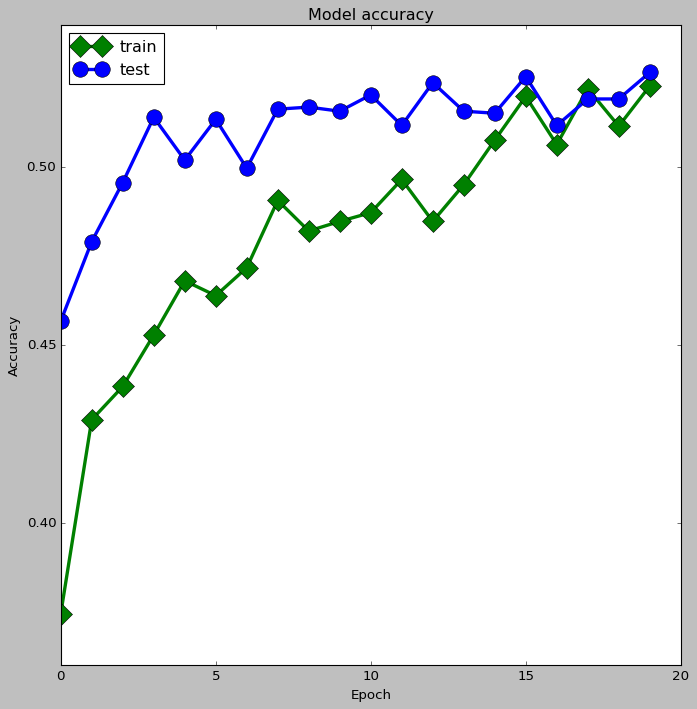

In [63]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],color="green",marker="D",markersize=14,lw=3)
plt.plot(history.history['val_accuracy'],color="blue",marker="o",markersize=14,lw=3)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

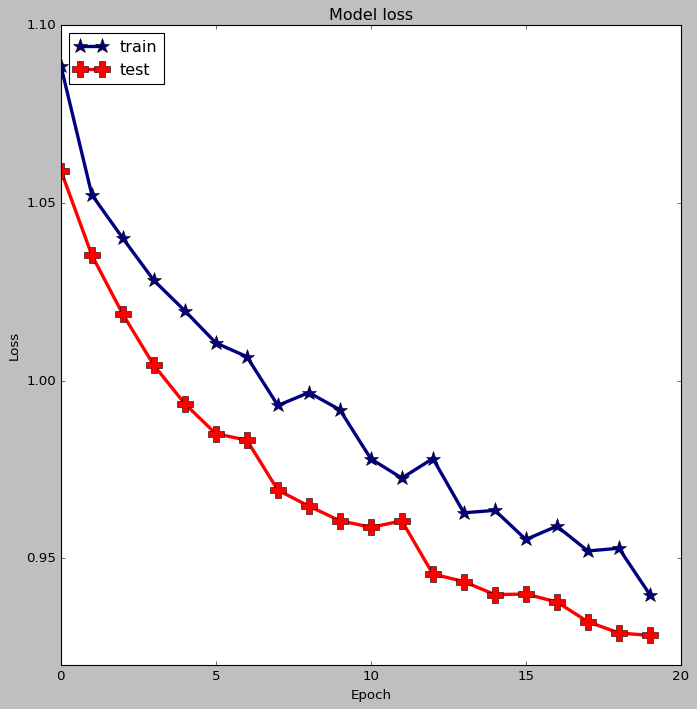

In [64]:
plt.style.use("classic")
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'],color="navy",marker="*",lw=3,markersize=14)
plt.plot(history.history['val_loss'],color="red",marker="P",lw=3,markersize=14)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [65]:
pred= model.predict([X_test_input,test_mask],batch_size=10)
final_pred = np.argmax(pred,axis=1)
accuracy_score(Y_test_label,final_pred)

175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


0.526647564469914

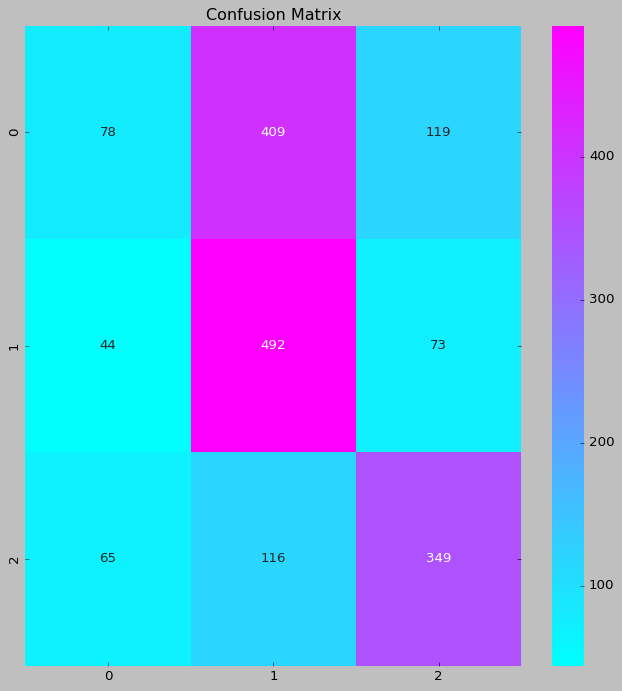

In [66]:
plt.figure(figsize=(10,10))
cm=confusion_matrix(Y_test_label,final_pred)
sn.heatmap(cm, annot=True, fmt='d',cmap="cool")
plt.title("Confusion Matrix")
plt.show()

In [67]:
print('Classification Report\n')
print(classification_report(Y_test_label,final_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.42      0.13      0.20       606
           1       0.48      0.81      0.61       609
           2       0.65      0.66      0.65       530

    accuracy                           0.53      1745
   macro avg       0.52      0.53      0.48      1745
weighted avg       0.51      0.53      0.48      1745



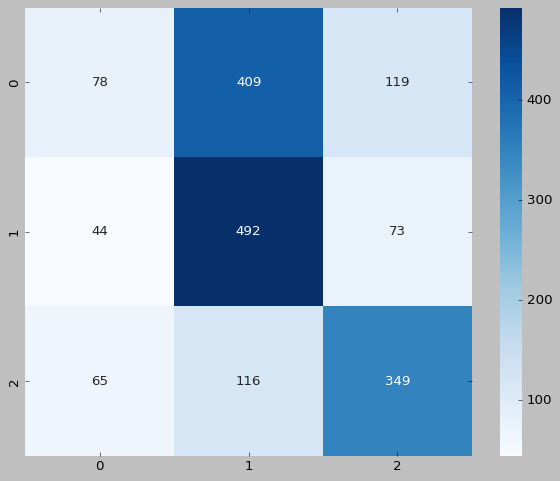

In [68]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(cm,cmap='Blues', annot=True,fmt='d')
plt.show()